In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing 
house_data = fetch_california_housing()
print(house_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

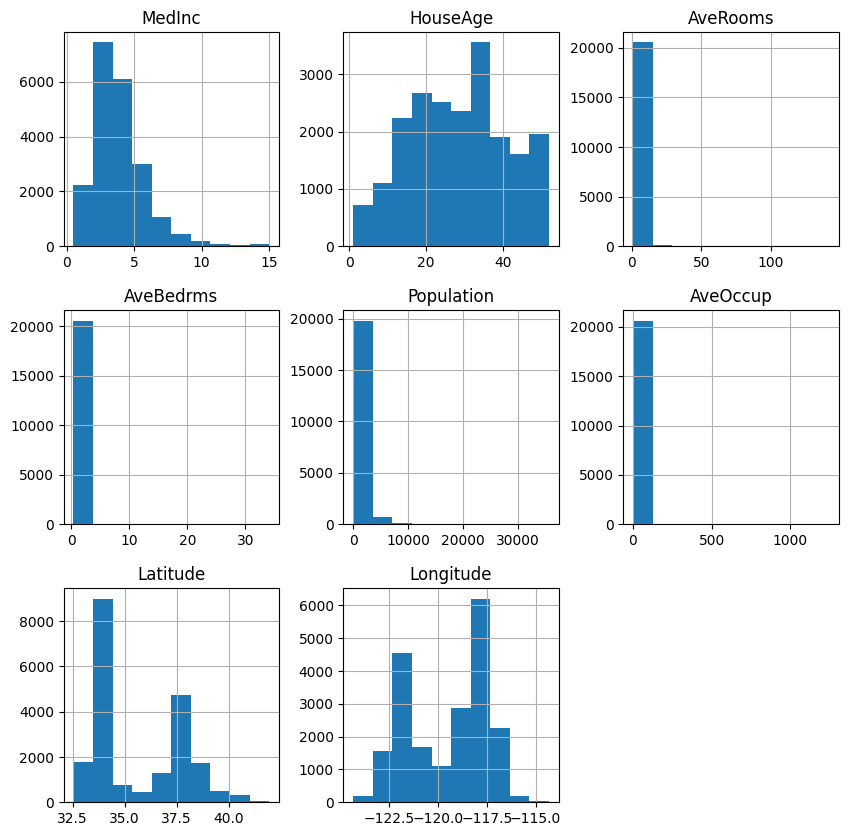

In [5]:
X.hist(X.columns, figsize=(10,10))

<Axes: >

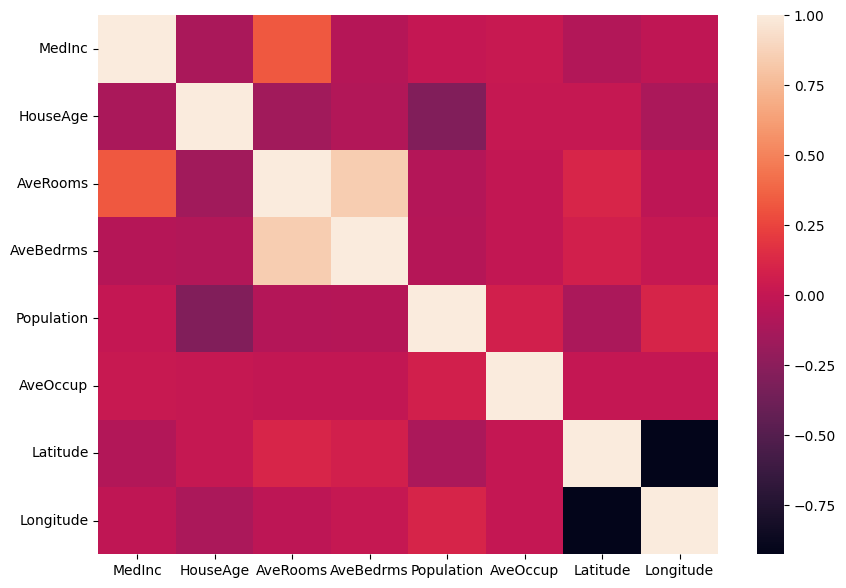

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(X.corr())

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_train_prediciton = model.predict(X_train)
y_test_prediciton = model.predict(X_test)

<BarContainer object of 8 artists>

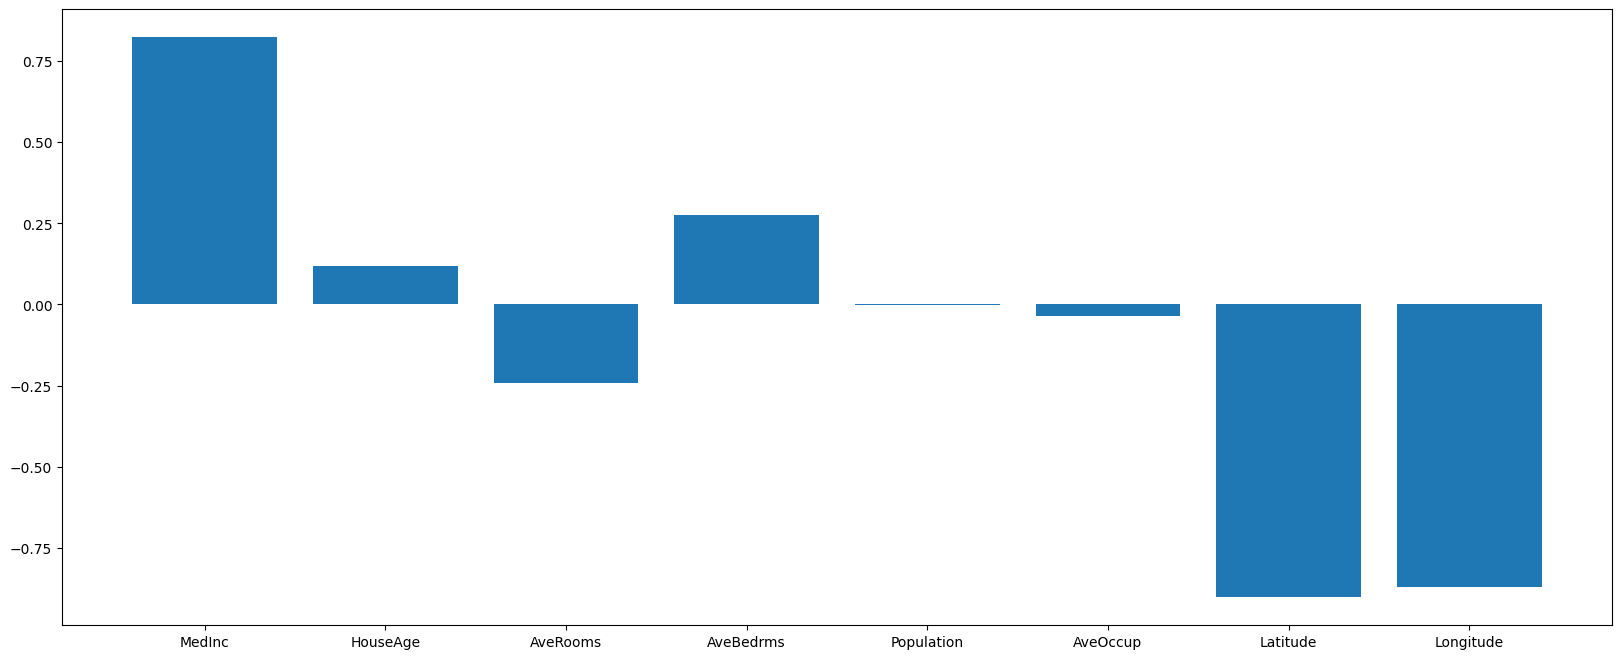

In [10]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f'Train MSE: {mean_absolute_error(y_train, y_train_prediciton)}')
print(f'Test MSE: {mean_absolute_error(y_test, y_test_prediciton)}')

print(f'Train MAE: {mean_absolute_error(y_train, y_train_prediciton)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_test_prediciton)}')

Train MSE: 0.5325567951646588
Test MSE: 0.5283090065403636
Train MAE: 0.5325567951646588
Test MAE: 0.5283090065403636


In [12]:
y.mean()

2.068558169089147

In [13]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(estimator=LinearRegression(), X=X, y=y, scoring='neg_mean_absolute_error', cv=5)
result

array([-0.54599439, -0.5661782 , -0.57654952, -0.53190614, -0.5168527 ])

In [14]:
print(f'Среднее MAE равно {-result.mean()}, стандартное отклонение MAE равно {result.std()}')

Среднее MAE равно 0.5474961907866818, стандартное отклонение MAE равно 0.02180569676818464
